In [ ]:
dataset_dir = '/content/drive/MyDrive/ImageClassification/Dataset_npy'

In [ ]:
from tensorflow import keras
model = keras.models.load_model(dataset_dir+'/trained_150epoch')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 anchor (InputLayer)         [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 compare (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 Embedding (Functional)      (None, 1024)                 7250310   ['anchor[0][0]',              
                                                          4          'compare[0][0]']             
                                                                                                  
 distance_layer (DistanceLa  (None, 1)                    0         ['Embedding[0][0]',       

In [ ]:
# Get the data directory paths
faces = dataset_dir+'/projectmembers_faces.npy'
faces_targets = dataset_dir+'/projectmembers_faces_target.npy'

In [ ]:
import numpy as np

In [ ]:
# Load the images and labels
face_images = np.load(faces)
face_labels = np.load(faces_targets)

In [ ]:
face_labels.shape

(188,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
# Function to generate image pairs
def generate_image_pairs(images, labels):
    # Generate index for each label
    unique_labels = np.unique(labels)
    label_wise_indices = dict()
    for label in unique_labels:
        label_wise_indices.setdefault(label,
                                      [index for index, curr_label in enumerate(labels) if
                                       label == curr_label])

    # Generate image pairs and labels
    pair_images = []
    pair_labels = []
    for index, image in enumerate(images):
        pos_indices = label_wise_indices.get(labels[index])
        pos_image = images[np.random.choice(pos_indices)]
        pair_images.append((image, pos_image))
        pair_labels.append(1)

        neg_indices = np.where(labels != labels[index])
        neg_image = images[np.random.choice(neg_indices[0])]
        pair_images.append((image, neg_image))
        pair_labels.append(0)

    return np.array(pair_images), np.array(pair_labels)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,roc_curve,precision_recall_curve

In [ ]:
images_dataset, labels_dataset = generate_image_pairs(face_images, face_labels)
images_dataset, labels_dataset = shuffle(images_dataset, labels_dataset)

In [ ]:
images_dataset_train, images_dataset_test, labels_dataset_train, labels_dataset_test = train_test_split(
                                  images_dataset, labels_dataset, test_size=0.2,shuffle= True)

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def visualize(image_pairs, n = 4, title = "Image Pair Examples"):
    """ Visualize a few pairs """

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))
    plt.title(title)
    axs = fig.subplots(n, 2)
    for i in range(n):
        #print(image_pairs[i][0].shape)
        show(axs[i, 0], image_pairs[i][0])
        show(axs[i, 1], image_pairs[i][1])

In [ ]:
def test_visualize(images, n = 4):
    """ Visualize a few images """

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))
    axs = fig.subplots(1, n)
    for i in range(n):
        show(axs[i], images[i])

In [ ]:
test_indices = [(0,59),(60,105),(106,157),(158,187)]
test_index = random.sample(range(1, 188), 1)[0]
print(test_index)
test_image = face_images[test_index]

compare_images = []
for i in range(4):
    #index = random.sample(range(i * 10, (i + 1) * 10), 1)[0]
    index = random.sample(range(test_indices[i][0],test_indices[i][1]), 1)[0]
    print(index)
    image = face_images[index]
    compare_images.append(image)

13
14
93
122
185


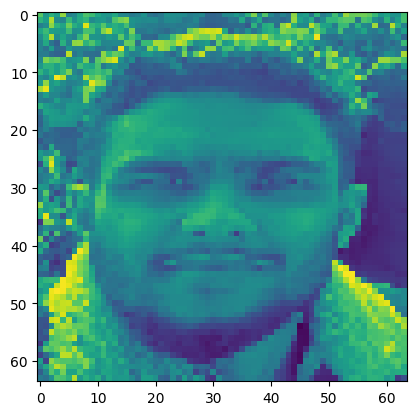

In [ ]:
plt.imshow(test_image)

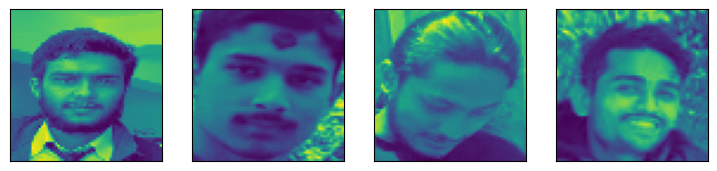

In [ ]:
test_visualize(compare_images)

In [ ]:
compare_images_labels = ['subash','vesnath','anuj','sovit']

In [ ]:
assert False

AssertionError: ignored

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


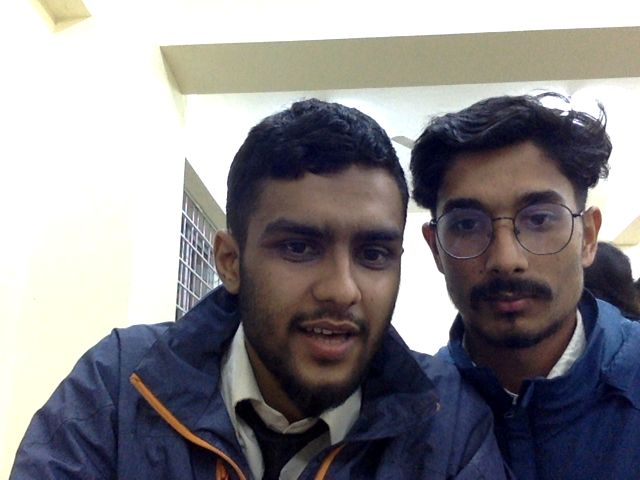

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-93-7cb568052fa6>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


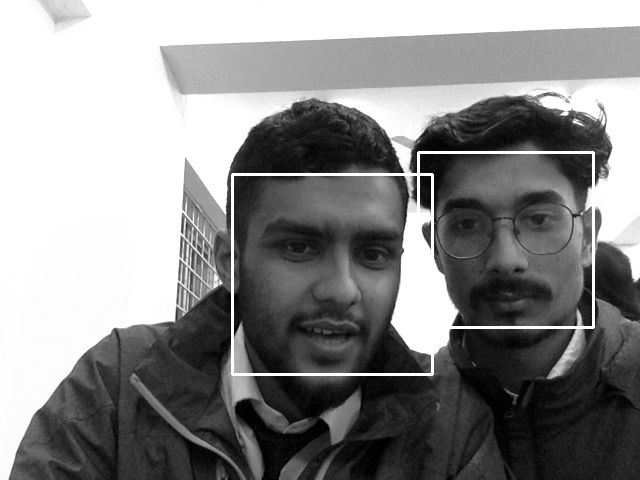

In [ ]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img=cv2.imread("photo.jpg",cv2.IMREAD_GRAYSCALE)

img_dup = img

#img=cv2.imread("meeee.jpg",cv2.IMREAD_UNCHANGED)

#resized_img = cv2.resize(img, (500, 500))
#cv2_imshow(img)

#print(img.shape)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
''' Our classifier returns the ROI of the detected face as a tuple,
It stores the top left coordinate and the bottom right coordiantes'''
faces = face_classifier.detectMultiScale(img, 1.0485258, 6)
'''When no faces detected, face_classifier returns and empty tuple'''
if faces is ():
    print("No faces found")
'''We iterate through our faces array and draw a rectangle over each face in faces'''

cropped_images = []


for (x,y,w,h) in faces:
    cv2.rectangle(img_dup, (x,y), (x+w,y+h), (255,255,255), 2)
    cropped_images.append(cv2.resize(img[y:y+h,x:x+w], (64, 64)))
    #cv2_imshow(resized_img[y:y+h,x:x+w])
    #cv2_imshow(resized_img)

cv2_imshow(img_dup)


In [ ]:
test_image = cropped_images[0]

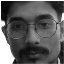

In [ ]:
cv2_imshow(test_image)

In [ ]:
image_pairs = []

for image in compare_images:
    image_pairs.append((test_image, image))

image_pairs = np.array(image_pairs)

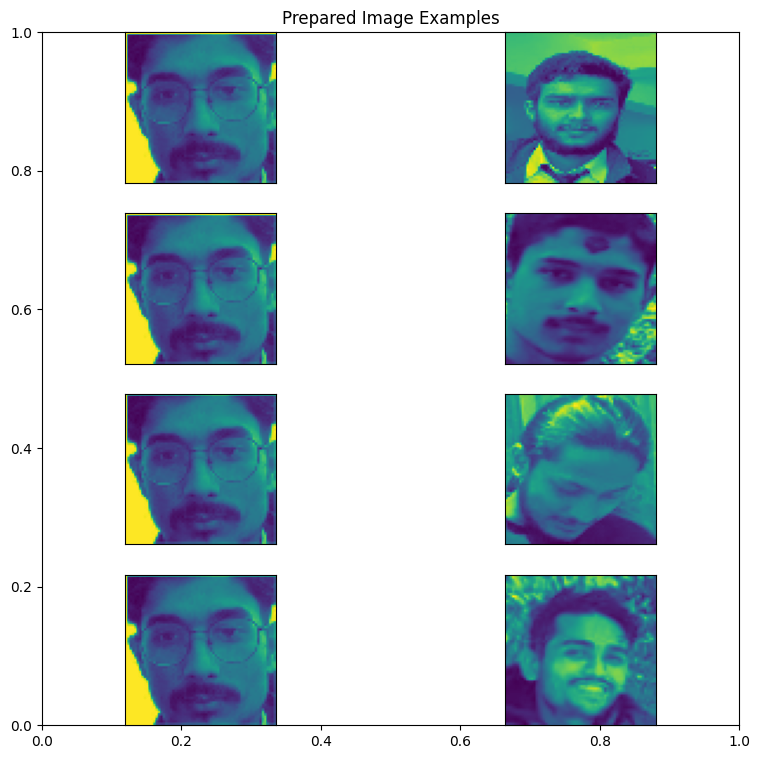

In [ ]:
visualize(image_pairs, title = "Prepared Image Examples")

In [ ]:
y_score = model.predict([image_pairs[:, 0, :], image_pairs[:, 1, :]])

1/1 [==============================] - 0s 291ms/step


In [ ]:
y_score

array([[1.7466975e-05],
       [4.1157440e-03],
       [6.8749691e-04],
       [1.7578537e-05]], dtype=float32)

In [ ]:
print(compare_images_labels[np.argmax(y_score)])

vesnath


In [ ]:
#print which person detected
if y_score[np.argmax(y_score)]>=0.5:
  print(compare_images_labels[np.argmax(y_score)])
else:
  print("Intruder Detected")

Intruder Detected


In [ ]:
x, y, thed = roc_curve(labels_dataset_test, y_score, pos_label=1)

J = y - x
ix = np.argmax(J)
best_thresh = thed[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(x, y, marker='.', label='Model')
plt.scatter(x[ix], y[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(labels_dataset_test, y_score)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(labels_dataset_test[labels_dataset_test==1]) / len(labels_dataset_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Model')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred = np.array([1 if x>0.277 else 0 for x in y_score])

# Print f1, precision, and recall scores
print(precision_score(labels_dataset_test, y_pred , average="macro"))
print(recall_score(labels_dataset_test, y_pred , average="macro"))
print(f1_score(labels_dataset_test, y_pred , average="macro"))

cf = confusion_matrix(labels_dataset_test, y_pred)

print(cf)

sns.heatmap(cf/np.sum(cf), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
x, y, thed = roc_curve(labels_dataset_test, y_score, pos_label=1)
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(x, y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(x, y, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
gmeans = np.sqrt(y * (1-x))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thed[ix], gmeans[ix]))

In [ ]:
J = y - x
ix = np.argmax(J)
best_thresh = thed[ix]
print('Best Threshold=%f' % (best_thresh))

In [ ]:
precision, recall, thresholds = precision_recall_curve(labels_dataset_test, y_score)

In [ ]:
no_skill = len(labels_dataset_test[labels_dataset_test==1]) / len(labels_dataset_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Model')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
plt.plot(thed)

In [ ]:
import seaborn as sns
sns.heatmap(cf, annot=True)

In [ ]:
cf = confusion_matrix(labels_dataset_test, y_pred)

In [ ]:
import numpy as np
cf = np.array([[20,3],[6,9]])
cf

In [ ]:
sns.heatmap(cf/np.sum(cf), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
test_indices = [(0,59),(60,105),(106,157),(158,187)]
test_index = random.sample(range(1, 188), 1)[0]
print(test_index)
test_image = face_images[test_index]

compare_images = []
for i in range(4):
    #index = random.sample(range(i * 10, (i + 1) * 10), 1)[0]
    index = random.sample(range(test_indices[i][0],test_indices[i][1]), 1)[0]
    print(index)
    image = face_images[index]
    compare_images.append(image)

In [ ]:
image_pairs = []

for image in compare_images:
    image_pairs.append((test_image, image))

image_pairs = np.array(image_pairs)